importing an image

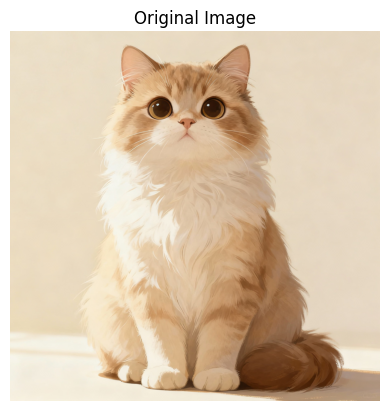

Image shape: (2048, 2048, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread

img = mpimg.imread('cat.jpg')

# display
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

# checking image shape
print("Image shape:", img.shape)


adjusting brightness

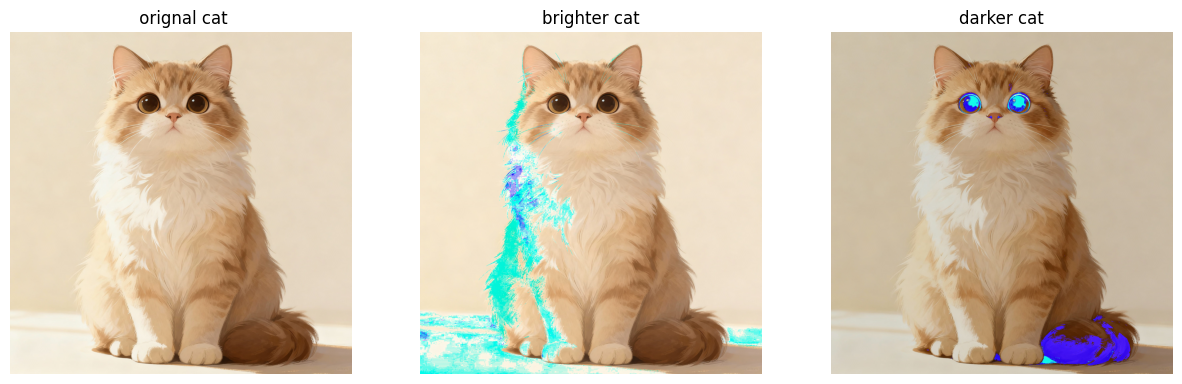

In [ ]:
brighter_img = np.clip(img + 10, 0, 255).astype(np.uint8)
darker_img = np.clip(img - 30, 0, 255).astype(np.uint8)

#display all three images
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].imshow(img)
axes[0].set_title(' orignal cat')

axes[1].imshow(brighter_img)
axes[1].set_title('brighter cat')

axes[2].imshow(darker_img)
axes[2].set_title('darker cat')

for ax in axes:
    ax.axis('off')

plt.show()

adjusting contrast

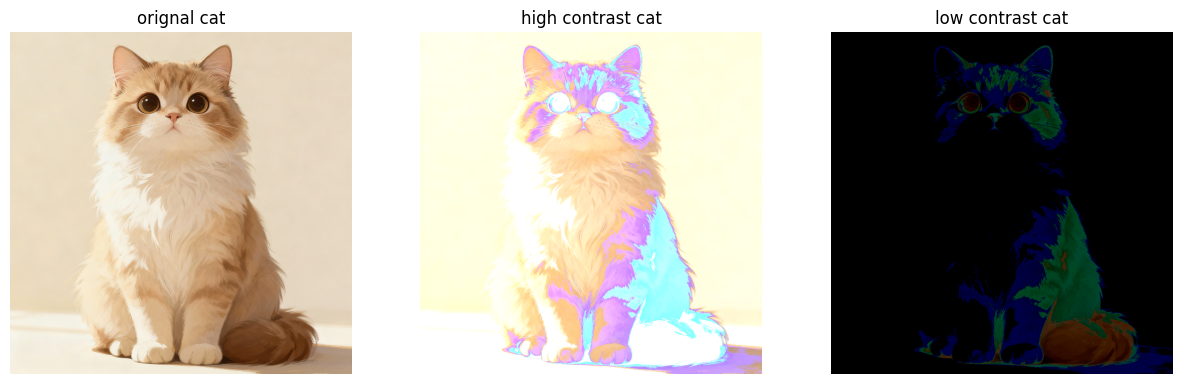

In [ ]:
#increasing or decreasing  contrast

contrast_high = np.clip(1.5*(img-128) + 128,0,255).astype(np.uint8)
contrast_low = np.clip(0.8*(img-128) - 128,0,255).astype(np.uint8)
 # display all three
fig , axes = plt.subplots(1,3,figsize=(15,5))
axes[0].imshow(img)
axes[0].set_title('orignal cat')

axes[1].imshow(contrast_high)
axes[1].set_title('high contrast cat')

axes[2].imshow(contrast_low)
axes[2].set_title('low contrast cat')

for ax in axes:
    ax.axis('off')
plt.show()

Accessing and  manipulating Pixel value

pixel value at 50 rows and 100 clmns: [239 227 203]


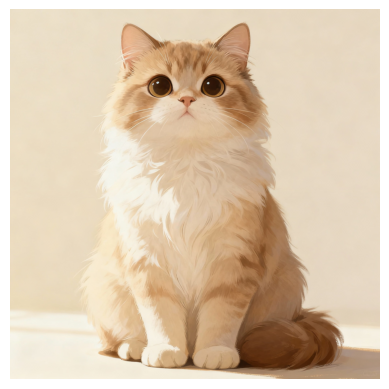

In [ ]:
img = imread("cat.jpg")

#accessing a single pixel
pixel = img[50, 100]
print("pixel value at 50 rows and 100 clmns:",pixel)

#modify that pixel
img = img.copy()
img[50, 100] = [0,255,0]

#display
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img[0:2,0:2])

[[[232 222 197]
  [235 225 200]]

 [[231 221 196]
  [232 222 197]]]


In [ ]:
print(img)

[[[232 222 197]
  [235 225 200]
  [234 224 199]
  ...
  [232 217 194]
  [230 215 192]
  [226 211 188]]

 [[231 221 196]
  [232 222 197]
  [234 224 199]
  ...
  [228 213 190]
  [228 213 190]
  [230 215 192]]

 [[233 223 198]
  [231 221 196]
  [232 222 197]
  ...
  [227 212 189]
  [228 213 190]
  [233 218 195]]

 ...

 [[245 239 223]
  [249 243 227]
  [250 244 228]
  ...
  [186 159 132]
  [187 160 133]
  [184 157 130]]

 [[245 239 223]
  [248 242 226]
  [250 244 228]
  ...
  [184 157 130]
  [185 158 131]
  [186 159 132]]

 [[249 243 227]
  [247 241 225]
  [249 243 227]
  ...
  [184 157 130]
  [183 156 129]
  [184 157 130]]]


In [ ]:
print(img[:5,:5])

[[[232 222 197]
  [235 225 200]
  [234 224 199]
  [232 222 197]
  [234 224 199]]

 [[231 221 196]
  [232 222 197]
  [234 224 199]
  [234 224 199]
  [233 223 198]]

 [[233 223 198]
  [231 221 196]
  [232 222 197]
  [236 226 201]
  [235 225 200]]

 [[234 224 199]
  [232 222 197]
  [231 221 196]
  [234 224 199]
  [235 225 200]]

 [[233 223 198]
  [234 224 199]
  [233 223 198]
  [231 221 196]
  [233 223 198]]]


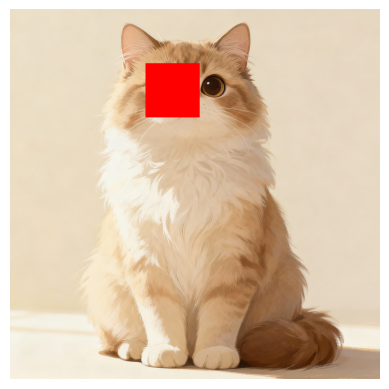

In [ ]:
img_region = img.copy()

# modifying a block of pixel

img_region[300:600,750:1050] = [255,0,0]
plt.imshow(img_region)
plt.axis('off')
plt.show()

region manipulation

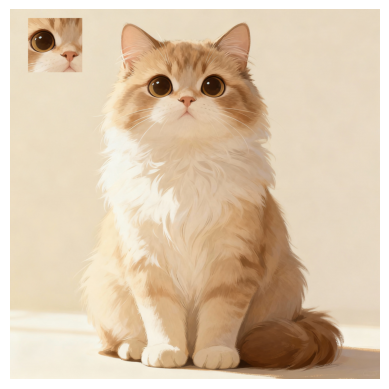

In [ ]:
from imageio.v2  import imread
img = imread("cat.jpg")
# make a copy
img_clone = img.copy()
#selecting region
region = img_clone[300:600,750:1050]
#pasting
img_clone[50:350,100:400]= region

plt.imshow(img_clone)
plt.axis('off')
plt.show()

Apply image filter or transformation

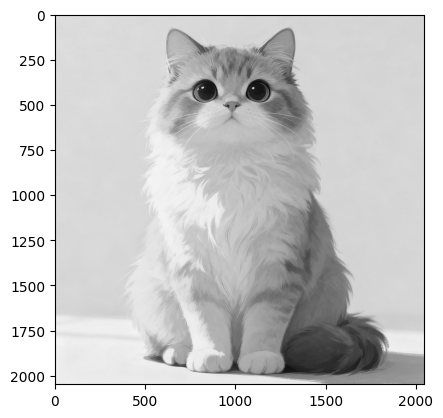

In [ ]:
img_array = imread("cat.jpg")
gray_img = np.mean(img_array,axis=-1)
plt.imshow(gray_img,cmap='gray')

image flipping or rotation

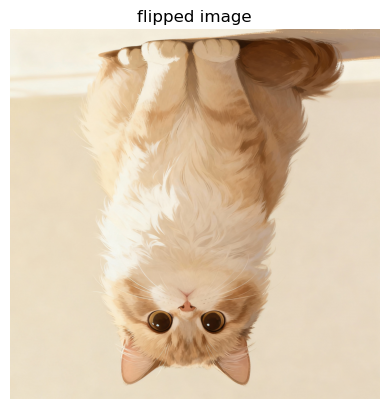

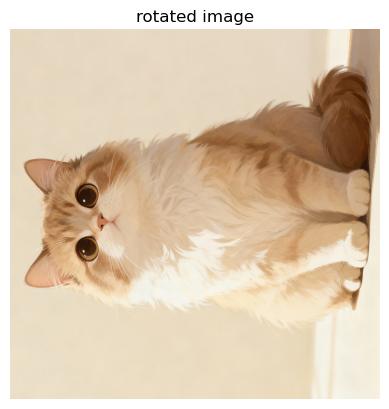

In [ ]:
flipped_img = np.flipud(img_array)
rotate_img = np.rot90(img_array)
plt.imshow(flipped_img)
plt.axis('off')
plt.title("flipped image")
plt.show()

plt.imshow(rotate_img)
plt.axis('off')
plt.title("rotated image")
plt.show()

edge detection

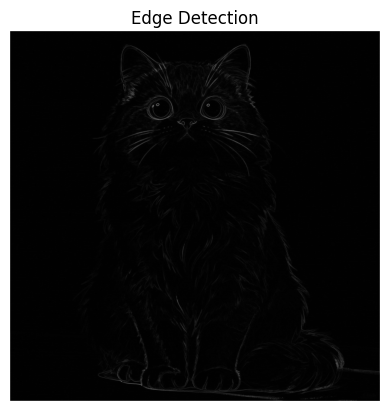

In [ ]:
img = imread("cat.jpg")
gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# edge detection filter
filter_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

filter_y = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]])

# apply convolution
def convolve(img, kernel):
    k = kernel.shape[0]
    pad = k // 2
    padded = np.pad(img, pad, mode='constant')
    result = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+k, j:j+k]
            result[i, j] = np.sum(region * kernel)
    return result

# apply filters
edges_x = convolve(gray, filter_x)
edges_y = convolve(gray, filter_y)
edges = np.sqrt(edges_x**2 + edges_y**2)

# display
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edge Detection')
plt.show()



blurring the image

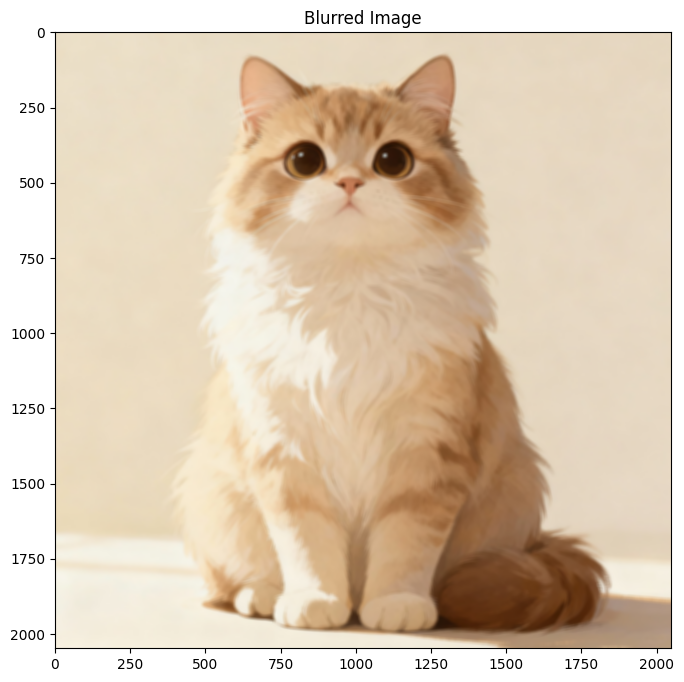

In [ ]:

from scipy.ndimage import convolve


blur_kernel = np.ones((13, 13)) / 169

blurred_image = np.zeros_like(img_array)
for i in range(3):
    blurred_image[:, :, i] = convolve(img_array[:, :, i], kernel)

plt.figure(figsize=(8, 8))
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.show()



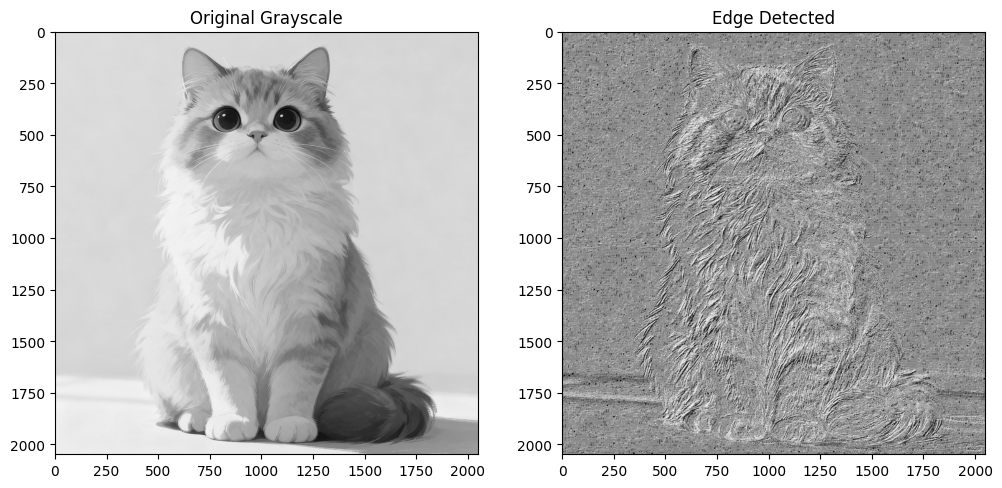

In [ ]:

from scipy import ndimage

# Convert to grayscale for edge detection
gray_img = np.mean(img_array, axis=2).astype(np.uint8)

# sobel filter for edge detection
sx = ndimage.sobel(gray_img, axis=0, mode='reflect')
sy = ndimage.sobel(gray_img, axis=1, mode='reflect')
sobel = np.hypot(sx, sy)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale')

plt.subplot(1, 2, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Edge Detected')
plt.show()


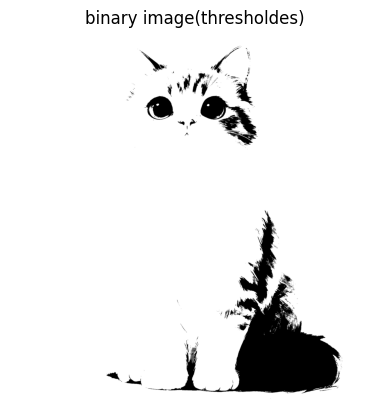

In [ ]:
import cv2

img = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)

threshold_value =120

_, binary_img = cv2.threshold(img,threshold_value,255,cv2.THRESH_BINARY)

plt.imshow(binary_img,cmap='gray')
plt.title('binary image(thresholdes)')
plt.axis('off')
plt.show()

erosion and dilation

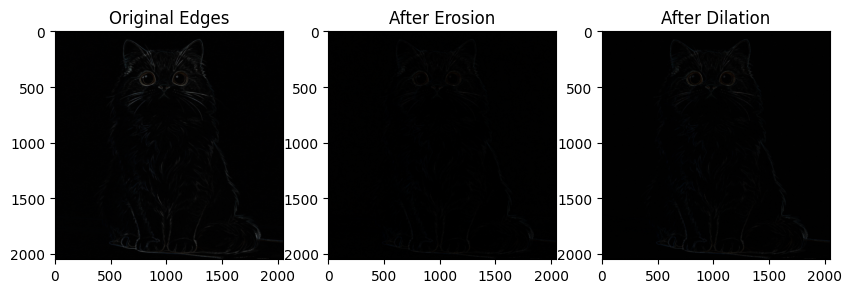

In [ ]:
kernel = np.ones((3,3), np.uint8)
# erodion
eroded = cv2.erode(edges, kernel, iterations=1)

#  dilation
dilated = cv2.dilate(eroded, kernel, iterations=1)

# display
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1,3,2)
plt.title("After Erosion")
plt.imshow(eroded, cmap='gray')

plt.subplot(1,3,3)
plt.title("After Dilation")
plt.imshow(dilated, cmap='gray')

plt.show()
